In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)
# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

> The goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

## Gathering Information

Let's view the columns and the variable types

In [2]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [3]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
for column_name in life_df.columns:
    print("Unique values in column {} are: {}".format(column_name, life_df[column_name].unique()))

Unique values in column Country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [5]:
life_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [6]:
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Null Values
Let's check the number of null values

In [7]:
life_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

And let's also look at the percentage of missing values per column

In [8]:
life_df.isnull().sum()*100/life_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

---
## Data Cleaning

First, let's clean the column names and make them consistent.

In [9]:
life_df.columns = life_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

Let's look at the data again with the number of unique value of each

In [10]:
life_df.nunique()

country                             193
year                                 16
status                                2
life_expectancy                     362
adult_mortality                     425
infant_deaths                       209
alcohol                            1076
percentage_expenditure             2328
hepatitis_b                          87
measles                             958
bmi                                 608
under-five_deaths                   252
polio                                73
total_expenditure                   818
diphtheria                           81
hiv/aids                            200
gdp                                2490
population                         2278
thinness__1-19_years                200
thinness_5-9_years                  207
income_composition_of_resources     625
schooling                           173
dtype: int64

Then let's fill in the missing "Life Expenctancy" data with the mean of our dataset.

In [11]:
life_df["life_expectancy"].fillna(life_df["life_expectancy"].mean(), inplace=True)

In [12]:
life_df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [13]:
life_df["adult_mortality"].fillna(life_df["adult_mortality"].mean(), inplace=True)
life_df["alcohol"].fillna(life_df["alcohol"].mean(), inplace=True)
life_df["bmi"].fillna(life_df["bmi"].mean(), inplace=True)
life_df["total_expenditure"].fillna(life_df["total_expenditure"].mean(), inplace=True)
life_df["income_composition_of_resources"].fillna(life_df["income_composition_of_resources"].mean(), inplace=True)

In [14]:
life_df.dropna(how='any', subset=['population','hepatitis_b','gdp'], inplace=True)
life_df.isnull().sum()*100/life_df.isnull().count()

country                            0.000000
year                               0.000000
status                             0.000000
life_expectancy                    0.000000
adult_mortality                    0.000000
infant_deaths                      0.000000
alcohol                            0.000000
percentage_expenditure             0.000000
hepatitis_b                        0.000000
measles                            0.000000
bmi                                0.000000
under-five_deaths                  0.000000
polio                              0.000000
total_expenditure                  0.000000
diphtheria                         0.000000
hiv/aids                           0.000000
gdp                                0.000000
population                         0.000000
thinness__1-19_years               0.670017
thinness_5-9_years                 0.670017
income_composition_of_resources    0.000000
schooling                          0.000000
dtype: float64

---
### Data Exploration

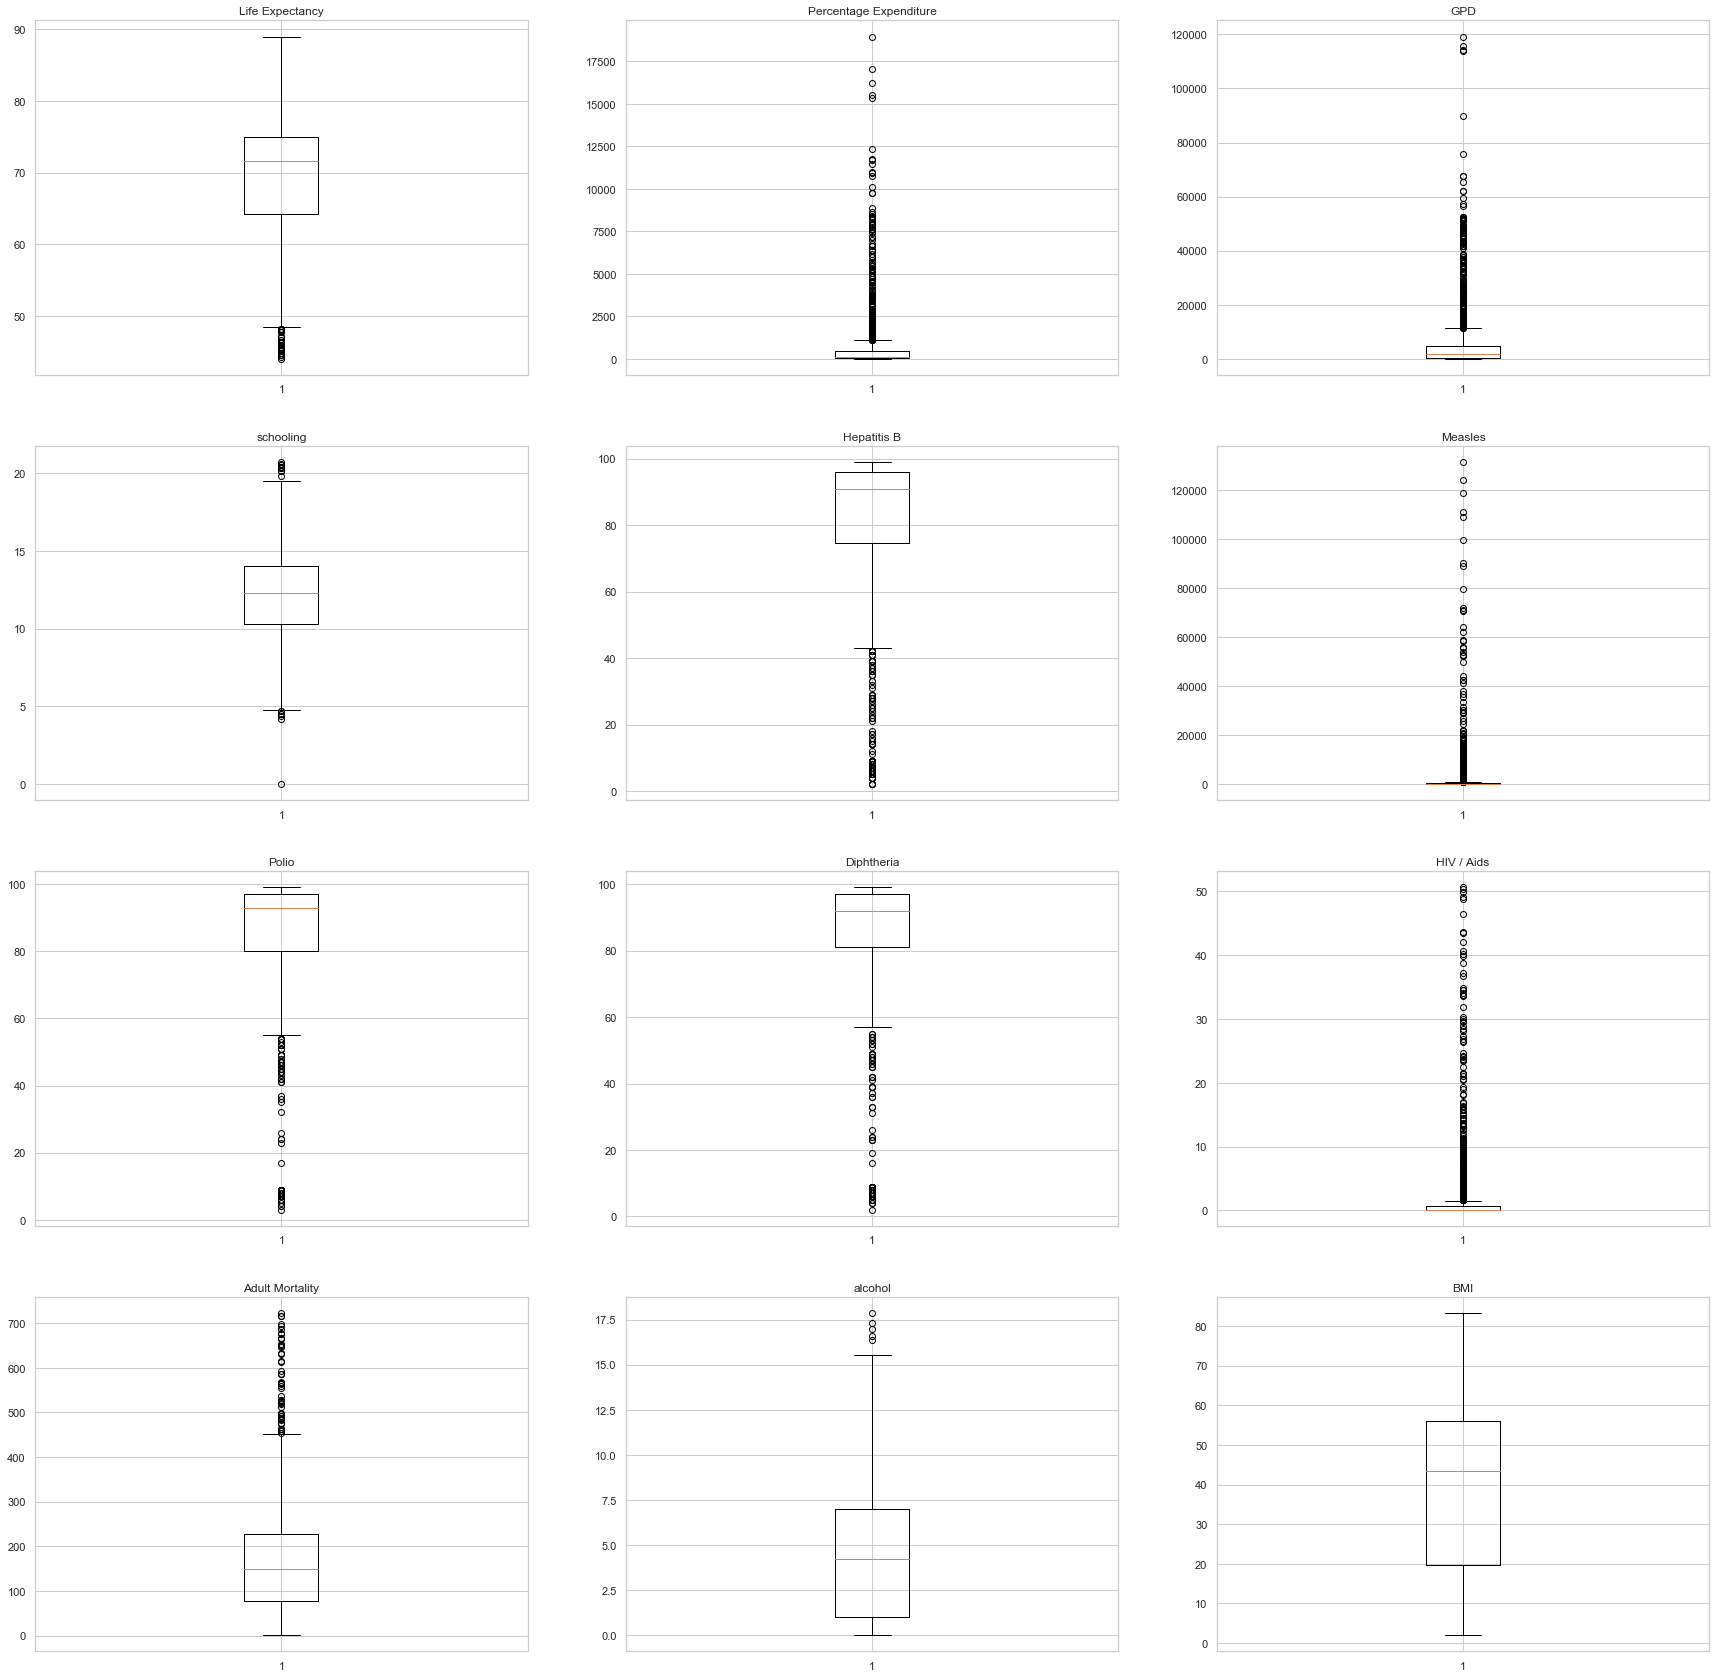

In [15]:
plt.figure(figsize = (30,30))

plt.subplot(4,3,1) 
plt.boxplot(life_df["life_expectancy"]) 
plt.title("Life Expectancy")

plt.subplot(4,3,2)
plt.boxplot(life_df["percentage_expenditure"])
plt.title("Percentage Expenditure")

plt.subplot(4,3,3)
plt.boxplot(life_df["gdp"])
plt.title("GPD")


plt.subplot(4,3,4)
plt.boxplot(life_df["schooling"])
plt.title("schooling")

plt.subplot(4,3,5)
plt.boxplot(life_df["hepatitis_b"])
plt.title("Hepatitis B")


plt.subplot(4,3,6)
plt.boxplot(life_df["measles"])
plt.title("Measles")


plt.subplot(4,3,7)
plt.boxplot(life_df["polio"])
plt.title("Polio")

plt.subplot(4,3,8)
plt.boxplot(life_df["diphtheria"])
plt.title("Diphtheria")

plt.subplot(4,3,9)
plt.boxplot(life_df["hiv/aids"])
plt.title("HIV / Aids")


plt.subplot(4,3,10)
plt.boxplot(life_df["adult_mortality"])
plt.title("Adult Mortality")

plt.subplot(4,3,11)
plt.boxplot(life_df["alcohol"])
plt.title("alcohol")

plt.subplot(4,3,12)
plt.boxplot(life_df["bmi"])
plt.title("BMI")

plt.show()

In [16]:
from scipy.stats.mstats import winsorize

life_df["wlife_expectancy"] = winsorized_views = winsorize(life_df["life_expectancy"], (0, 0.10))
life_df["wpercentage_expenditure"] = winsorized_views = winsorize(life_df["percentage_expenditure"], (0, 0.10))
life_df["wgdp"] = winsorized_views = winsorize(life_df["gdp"], (0, 0.10))

life_df["wschooling"] = winsorized_views = winsorize(life_df["schooling"], (0, 0.10))

life_df["wmeasles"] = winsorized_views = winsorize(life_df["measles"], (0, 0.10))
# removed hepatitis, polio, diphtheria  because winsorized has a 1:1 correlation

life_df["whiv/aids"] = winsorized_views = winsorize(life_df["hiv/aids"], (0, 0.10))

life_df["wadult_mortality"] = winsorized_views = winsorize(life_df["adult_mortality"], (0, 0.10))
life_df["walcohol"] = winsorized_views = winsorize(life_df["alcohol"], (0, 0.10))

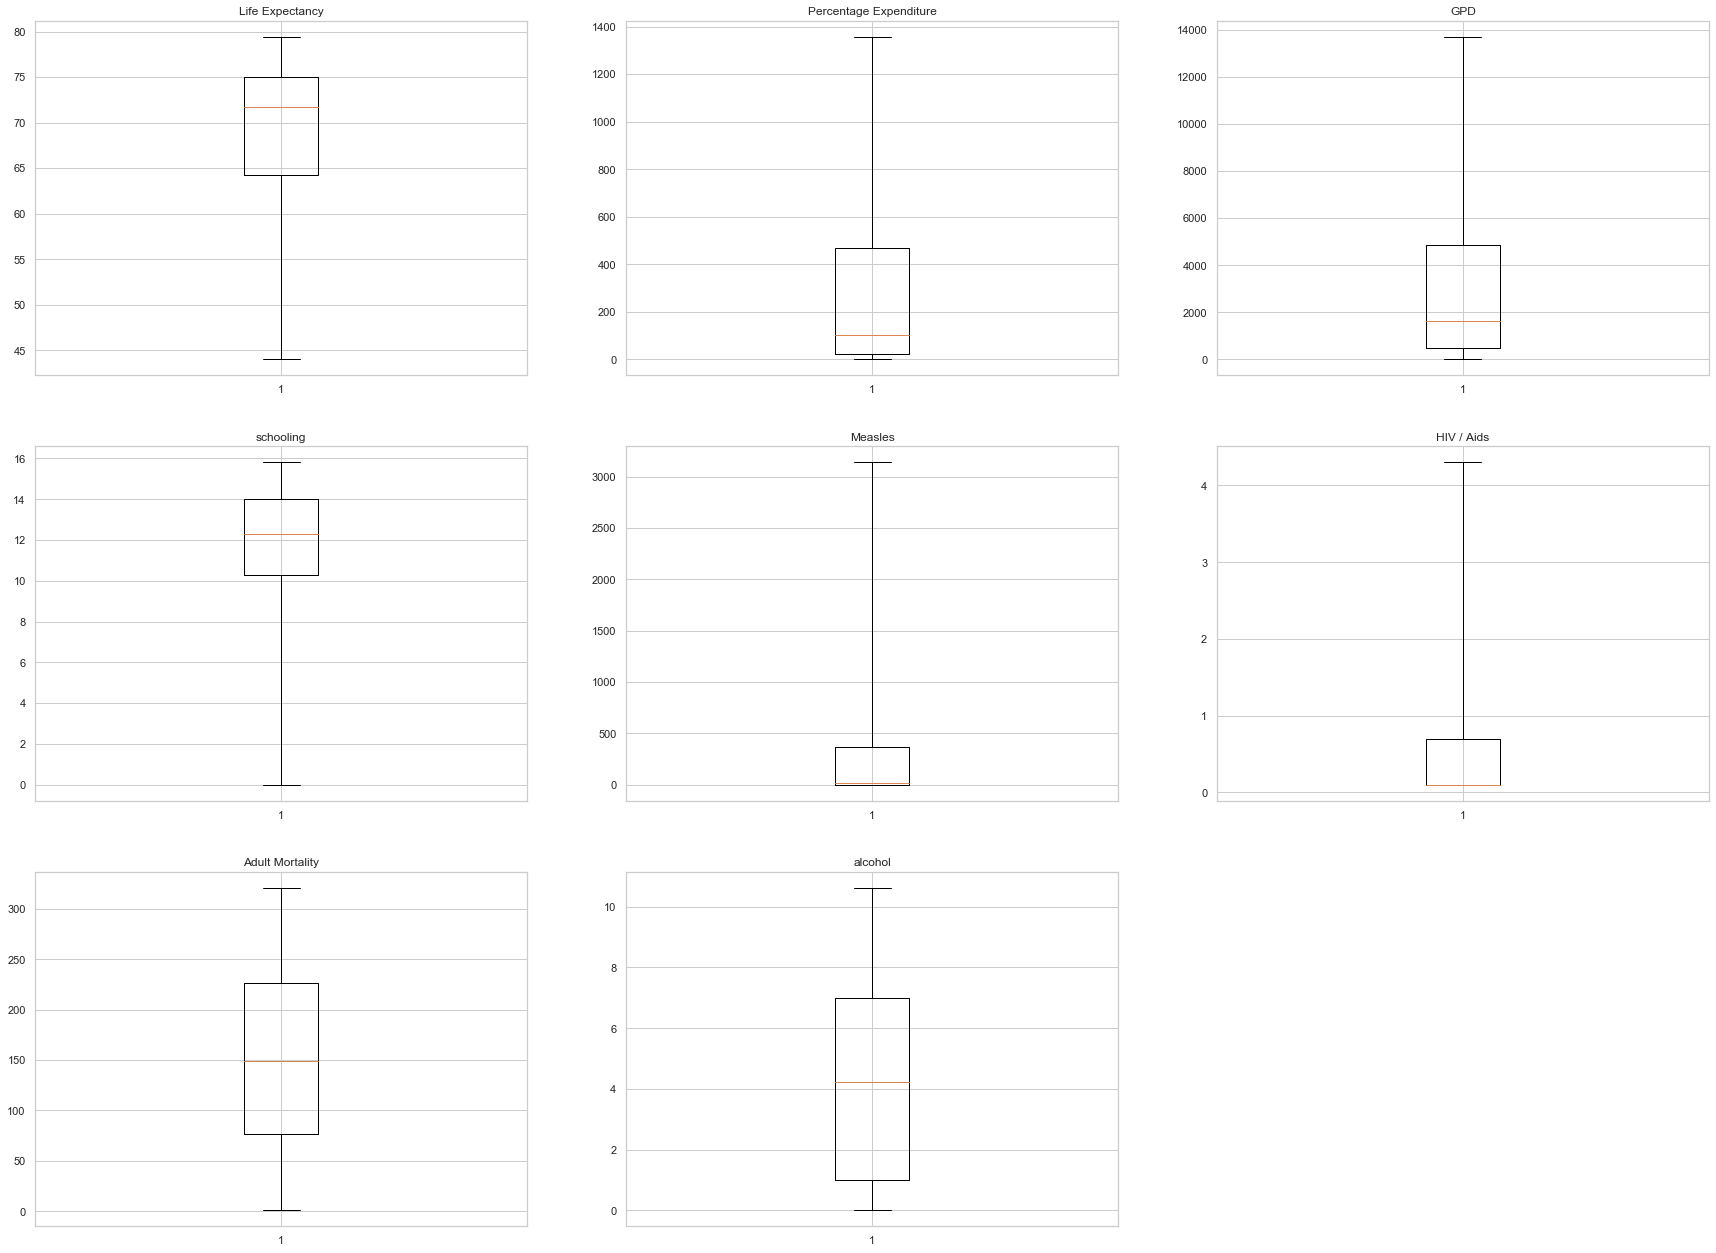

In [38]:
plt.figure(figsize = (30,30))


plt.subplot(4,3,1) 
plt.boxplot(life_df["wlife_expectancy"], whis = 5) 
plt.title("Life Expectancy")

plt.subplot(4,3,2)
plt.boxplot(life_df["wpercentage_expenditure"], whis = 5)
plt.title("Percentage Expenditure")

plt.subplot(4,3,3)
plt.boxplot(life_df["wgdp"], whis = 5)
plt.title("GPD")


plt.subplot(4,3,4)
plt.boxplot(life_df["wschooling"], whis = 5)
plt.title("schooling")



plt.subplot(4,3,5)
plt.boxplot(life_df["wmeasles"], whis = 15)
plt.title("Measles")


plt.subplot(4,3,6)
plt.boxplot(life_df["whiv/aids"], whis = 15)
plt.title("HIV / Aids")


plt.subplot(4,3,7)
plt.boxplot(life_df["wadult_mortality"], whis = 5)
plt.title("Adult Mortality")

plt.subplot(4,3,8)
plt.boxplot(life_df["walcohol"], whis = 5)
plt.title("alcohol")

plt.show()

In [18]:
life_df.describe(include= 'all')

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,income_composition_of_resources,schooling,wlife_expectancy,wpercentage_expenditure,wgdp,wschooling,wmeasles,whiv/aids,wadult_mortality,walcohol
count,1791,1791.000000,1791,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,...,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.00000,1791.000000,1791.000000,1791.000000,1791.000000
unique,137,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2008.375209,NaN,69.358933,167.942263,32.346734,4.517926,644.573302,79.221664,2190.097711,...,0.633598,12.122613,69.071943,327.090013,3625.372403,12.02105,525.262982,0.823562,156.476043,4.358568
std,NaN,4.348753,NaN,8.734481,123.386185,118.839603,3.875491,1698.222765,25.653329,9986.033013,...,0.181230,2.839086,8.306986,433.380738,4324.624163,2.65637,1010.108425,1.356294,96.052488,3.552060
min,NaN,2000.000000,NaN,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,...,0.000000,0.000000,44.000000,0.000000,1.681350,0.00000,0.000000,0.100000,1.000000,0.010000
25%,NaN,2005.000000,NaN,64.300000,77.000000,1.000000,1.005000,24.100084,74.500000,0.000000,...,0.509500,10.300000,64.300000,24.100084,483.201545,10.30000,0.000000,0.100000,77.000000,1.005000
50%,NaN,2009.000000,NaN,71.700000,149.000000,3.000000,4.220000,104.314473,91.000000,15.000000,...,0.673000,12.300000,71.700000,104.314473,1634.814310,12.30000,15.000000,0.100000,149.000000,4.220000
75%,NaN,2012.000000,NaN,75.000000,227.000000,23.000000,7.005000,466.703840,96.000000,371.000000,...,0.754000,14.000000,75.000000,466.703840,4844.120947,14.00000,371.000000,0.700000,227.000000,7.005000


What are the factors increase the expected life in the countries and which factors decrease it?

In [19]:
life_df.groupby("status").mean()[["wlife_expectancy", "population", "wgdp", "total_expenditure"]]

,wlife_expectancy,population,wgdp,total_expenditure
status,,,,
Developed,77.427203,9.149065e+06,8683.946574,6.944121
Developing,67.646634,1.535329e+07,2762.439162,5.801614


It is interesting to see that there's only a 10 year difference between developed and developing countries in term of life expectancy. Population and GDP is larger in develop countries and the expeditures is one point difference.

In [20]:
life_df.groupby("status").count()[["wadult_mortality", "infant_deaths"]]

,wadult_mortality,infant_deaths
status,,
Developed,261,261
Developing,1530,1530


In [21]:
life_df.groupby("status").mean()[["wmeasles", "hepatitis_b","polio","diphtheria","walcohol","whiv/aids"]]

,wmeasles,hepatitis_b,polio,diphtheria,walcohol,whiv/aids
status,,,,,,
Developed,272.038314,87.923372,94.517241,94.685824,9.365955,0.100000
Developing,568.460131,77.737255,81.436601,82.147059,3.504366,0.946993


In **developed countries**, they have a high rate of mortality due to Hepatitis B, Polio, Diphtherua and death cause by Alcohol. While in **developing countries**, they have high rate of death caused by Measles and HIV/Aids.

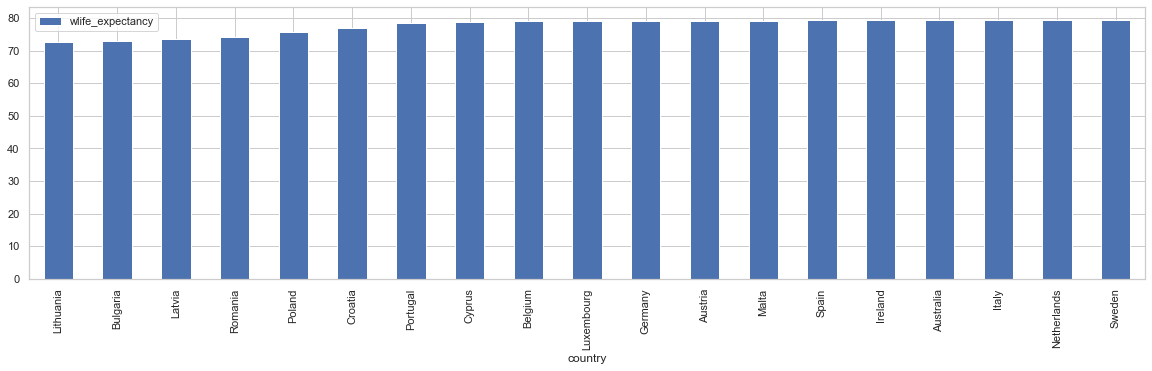

In [39]:
developed_df1=life_df[life_df.status == 'Developed'].pivot_table( index=['country'], 
                                                                 values=["wlife_expectancy"], aggfunc="mean")
developed_df2 = developed_df1.reset_index()
developed_df2.sort_values(by=['wlife_expectancy'], inplace=True)
developed_df2.plot.bar(x='country', y='wlife_expectancy')
plt.show()

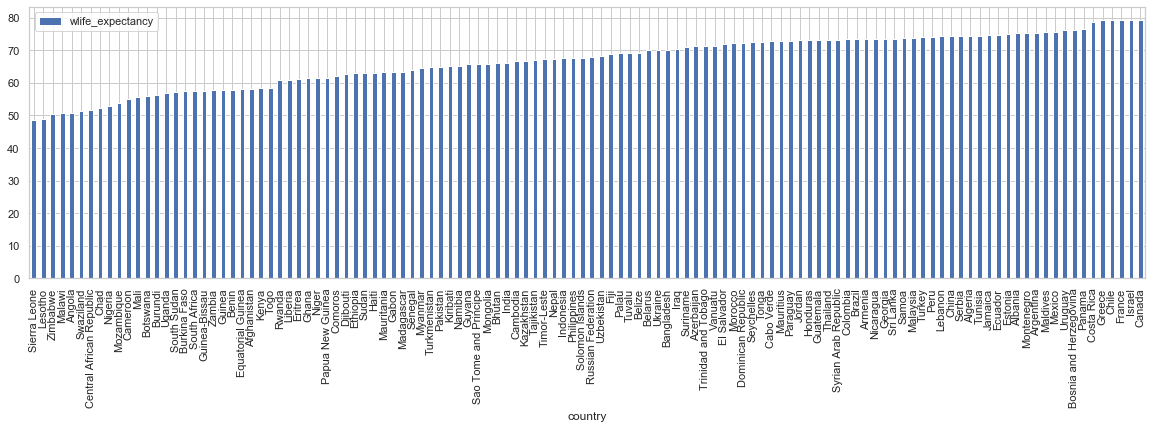

In [23]:
developing_df1 = life_df[life_df.status == 'Developing'].pivot_table(index=['country'], 
                                                                  values=["wlife_expectancy"], aggfunc="mean")
developing_df2 = developing_df1.reset_index()

developing_df2.sort_values(by=['wlife_expectancy'], inplace=True)

plt.rcParams['figure.figsize'] = [20, 5]

developing_df2.plot.bar(x='country', y='wlife_expectancy')
plt.show()

---
### Feature Engineering

In [24]:
life_df.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,income_composition_of_resources,schooling,wlife_expectancy,wpercentage_expenditure,wgdp,wschooling,wmeasles,whiv/aids,wadult_mortality,walcohol
year,1.000000,0.059332,-0.038505,0.002695,-0.102495,0.016158,0.105883,-0.051601,0.020932,0.004304,...,0.131730,0.091963,0.044249,0.020934,0.131344,0.088305,-0.078730,0.008124,-0.002453,-0.099141
life_expectancy,0.059332,1.000000,-0.703491,-0.171953,0.391743,0.390674,0.211600,-0.067722,0.539307,-0.195632,...,0.732229,0.728458,0.991931,0.505268,0.531860,0.728256,-0.186219,-0.746076,-0.646463,0.391131
adult_mortality,-0.038505,-0.703491,1.000000,0.048285,-0.172791,-0.229087,-0.105443,-0.002034,-0.348913,0.066353,...,-0.450216,-0.421516,-0.710833,-0.286355,-0.299953,-0.420523,0.103934,0.620974,0.937734,-0.170925
infant_deaths,0.002695,-0.171953,0.048285,1.000000,-0.104420,-0.087295,-0.221025,0.547925,-0.232228,0.996716,...,-0.139116,-0.212618,-0.171695,-0.148621,-0.141783,-0.217300,0.436957,0.074865,0.053417,-0.102135
alcohol,-0.102495,0.391743,-0.172791,-0.104420,1.000000,0.414577,0.107843,-0.048438,0.335605,-0.099863,...,0.547319,0.593250,0.372288,0.508208,0.516733,0.587665,-0.108742,-0.105610,-0.205388,0.989069
percentage_expenditure,0.016158,0.390674,-0.229087,-0.087295,0.414577,1.000000,0.015974,-0.059447,0.226529,-0.088768,...,0.382879,0.395121,0.349878,0.699302,0.648454,0.363408,-0.082046,-0.159348,-0.259460,0.403908
hepatitis_b,0.105883,0.211600,-0.105443,-0.221025,0.107843,0.015974,1.000000,-0.112588,0.139695,-0.230856,...,0.192273,0.229237,0.217735,0.066941,0.100804,0.237497,-0.179755,-0.184709,-0.092716,0.110675
measles,-0.051601,-0.067722,-0.002034,0.547925,-0.048438,-0.059447,-0.112588,1.000000,-0.151565,0.530737,...,-0.058535,-0.109791,-0.064941,-0.101818,-0.089973,-0.110056,0.532620,0.018010,-0.006951,-0.045044
bmi,0.020932,0.539307,-0.348913,-0.232228,0.335605,0.226529,0.139695,-0.151565,1.000000,-0.239968,...,0.514812,0.543606,0.539336,0.336342,0.381307,0.549622,-0.243419,-0.386685,-0.362254,0.337537
under-five_deaths,0.004304,-0.195632,0.066353,0.996716,-0.099863,-0.088768,-0.230856,0.530737,-0.239968,1.000000,...,-0.153120,-0.225086,-0.196472,-0.151699,-0.146563,-0.230483,0.434750,0.103700,0.070774,-0.097029


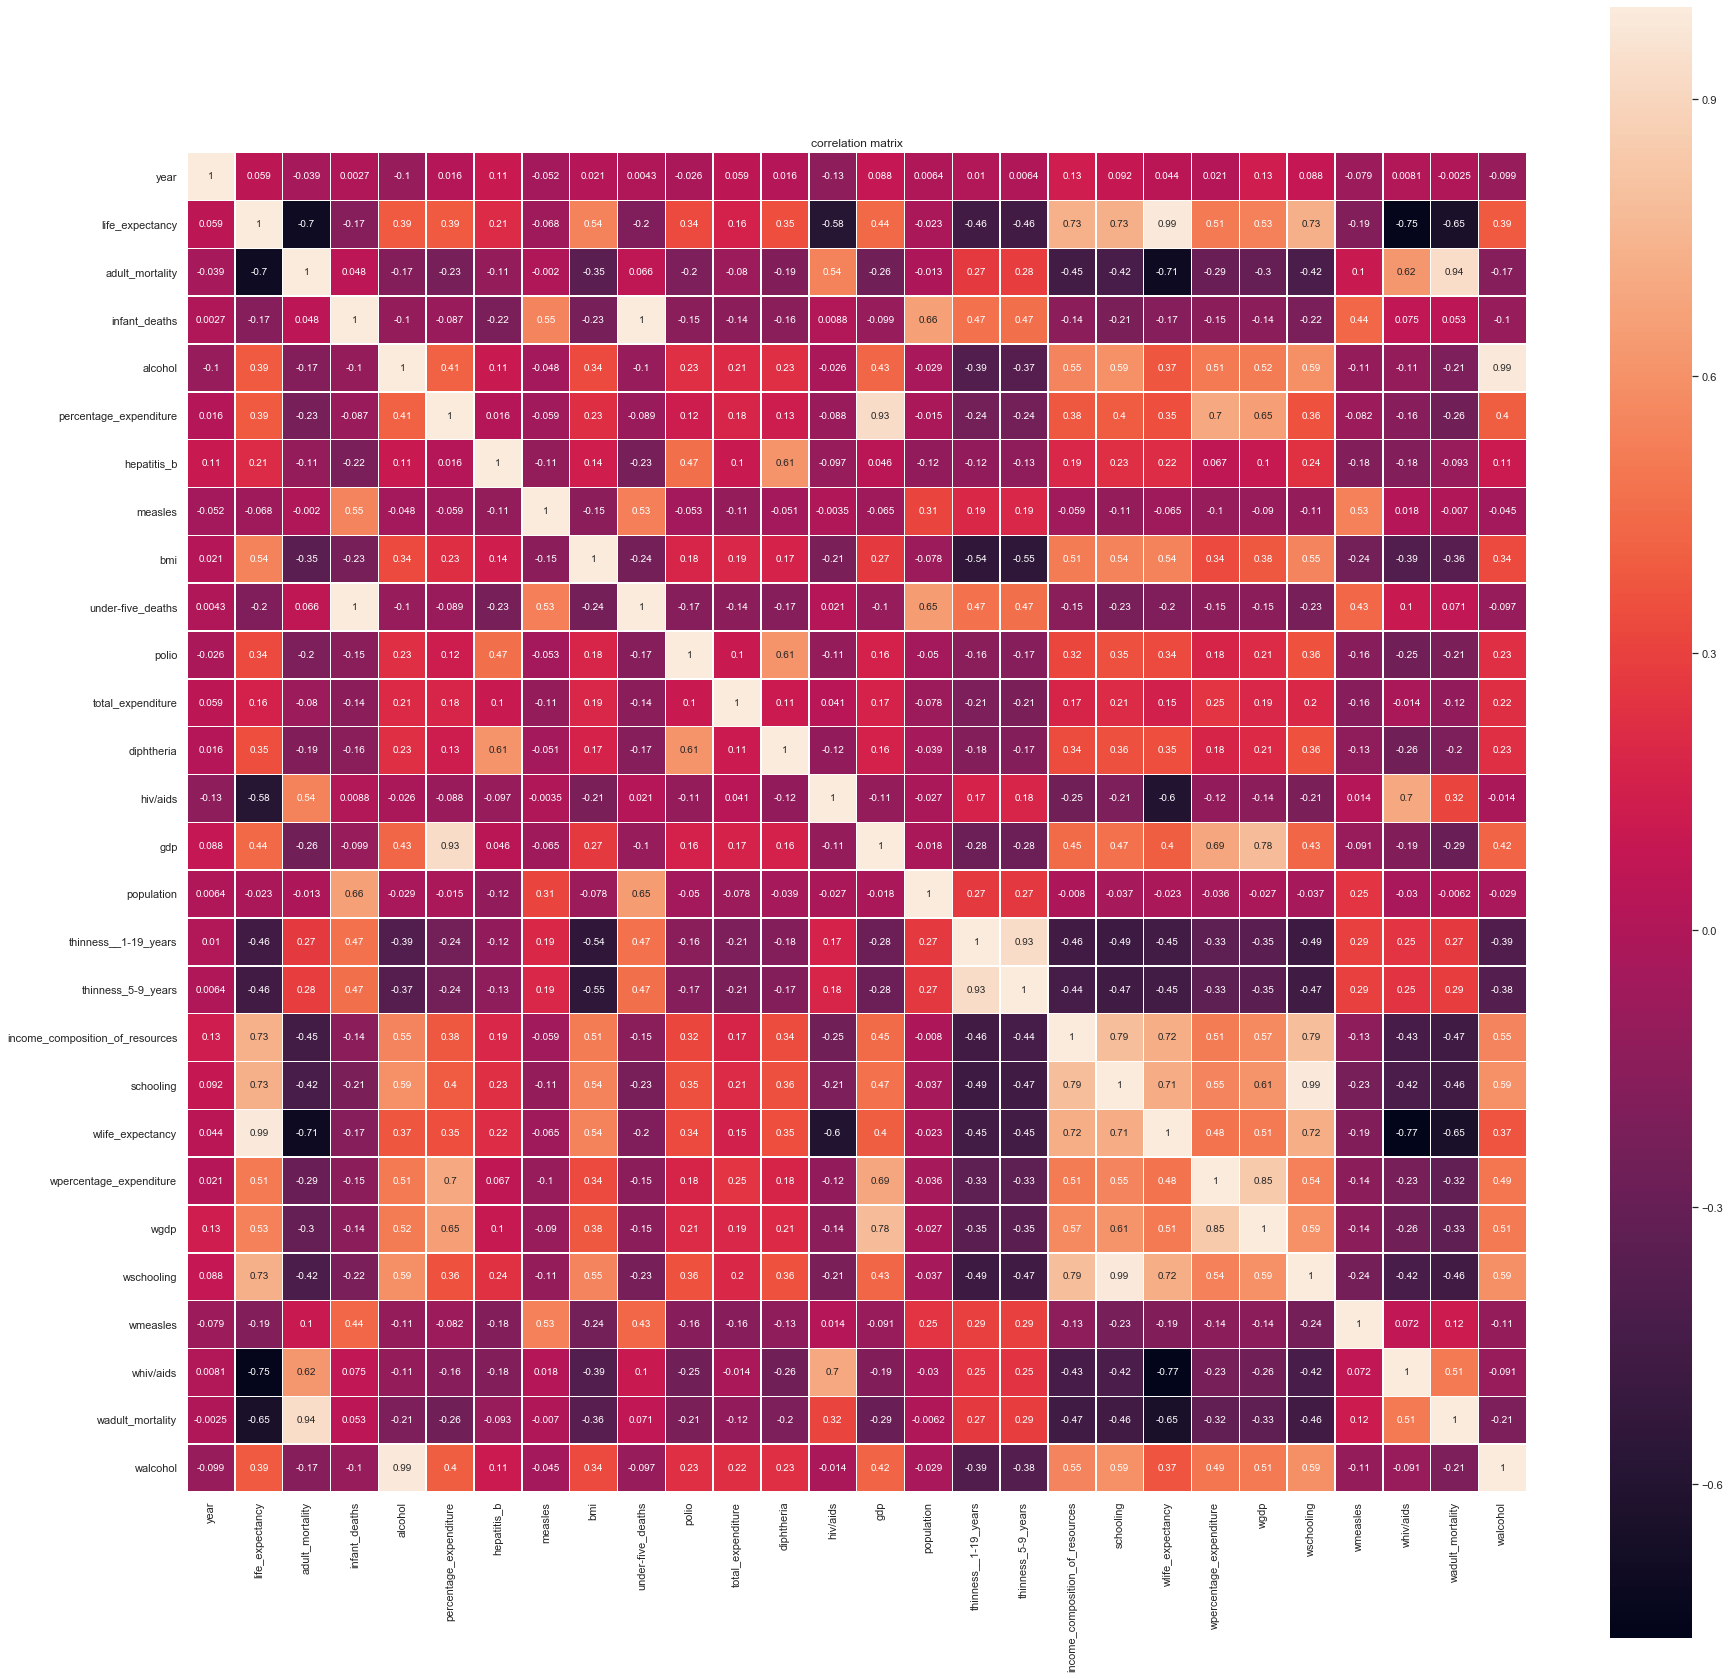

In [25]:
# make the correlation matrices.
life_cmat = life_df.corr()

plt.figure(figsize=(30,30))

# draw the heatmap using seaborn.
sns.heatmap(life_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

In [35]:
# remove infant death and under 5 death.
#check 1:1 and drop the columns

life_df_clean=life_df.drop(columns='under-five_deaths')

In [36]:
life_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1791 entries, 0 to 2937
Data columns (total 29 columns):
country                            1791 non-null object
year                               1791 non-null int64
status                             1791 non-null object
life_expectancy                    1791 non-null float64
adult_mortality                    1791 non-null float64
infant_deaths                      1791 non-null int64
alcohol                            1791 non-null float64
percentage_expenditure             1791 non-null float64
hepatitis_b                        1791 non-null float64
measles                            1791 non-null int64
bmi                                1791 non-null float64
polio                              1791 non-null float64
total_expenditure                  1791 non-null float64
diphtheria                         1791 non-null float64
hiv/aids                           1791 non-null float64
gdp                                1791 non-nu

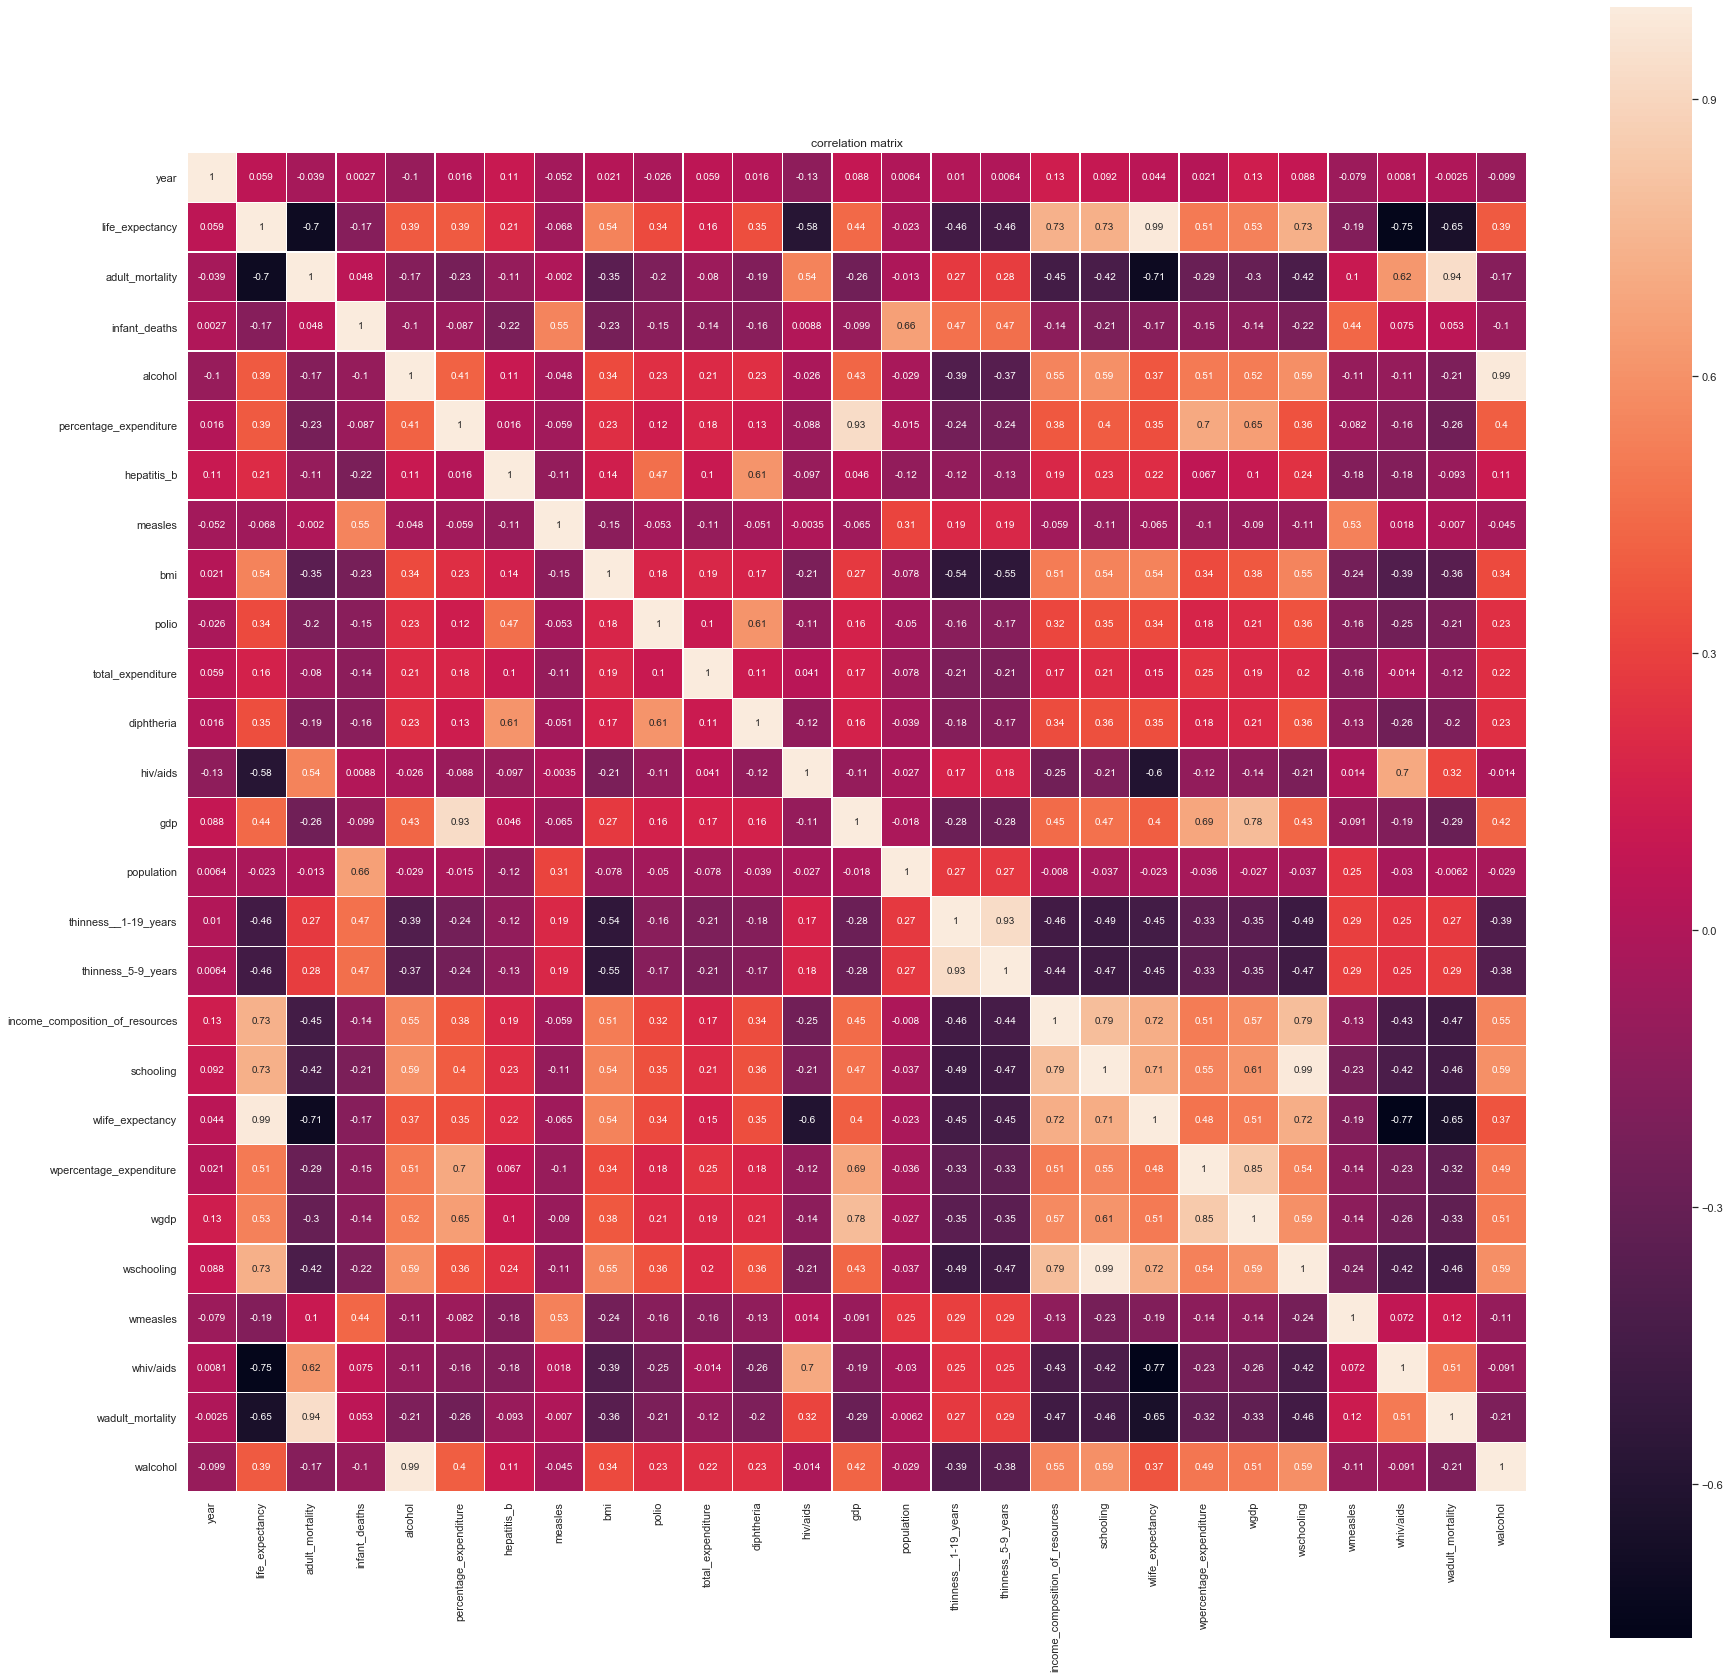

In [37]:
# make the correlation matrices.
life_cmat2 = life_df_clean.corr()

plt.figure(figsize=(30,30))

# draw the heatmap using seaborn.
sns.heatmap(life_cmat2, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()